### Experiment Conducted for the University of São Paulo Postgraduate Class EAD6034 - Time Series Econometrics (2023)

##### Prof. Dr. Leandro dos Santos Maciel

##### Main Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Full Sampled Series

<AxesSubplot: xlabel='TIME'>

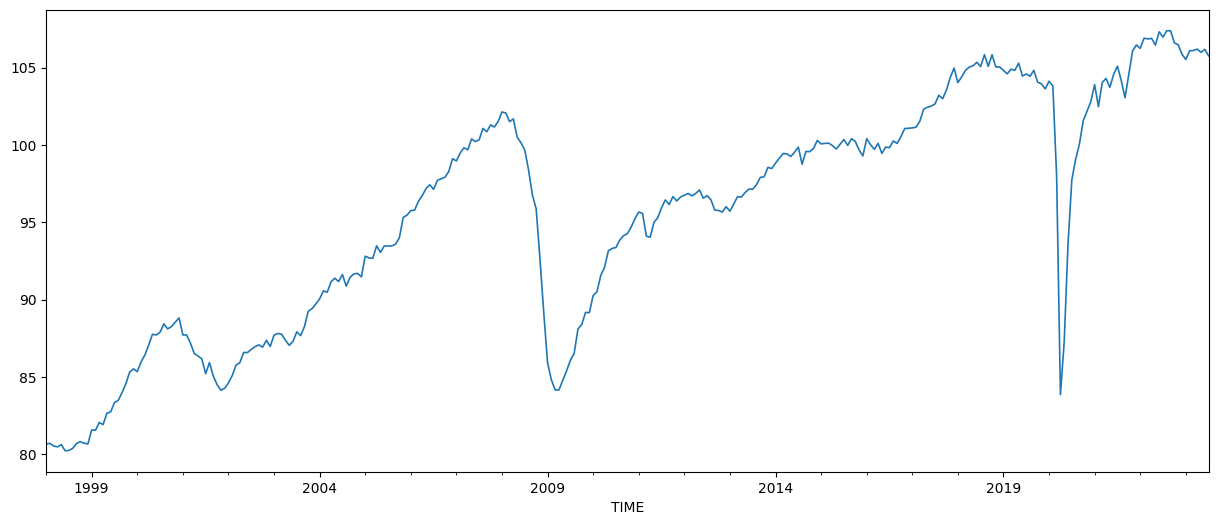

In [147]:
raw_industrial = pd.read_excel(r'OECD_Industrial.xlsx', index_col=0)
raw_industrial.index = pd.to_datetime(raw_industrial.index)

raw_industrial.plot(figsize=(15,6), legend=False,  linewidth=1.2)



#### Division of the Dataset in/out-of-sample

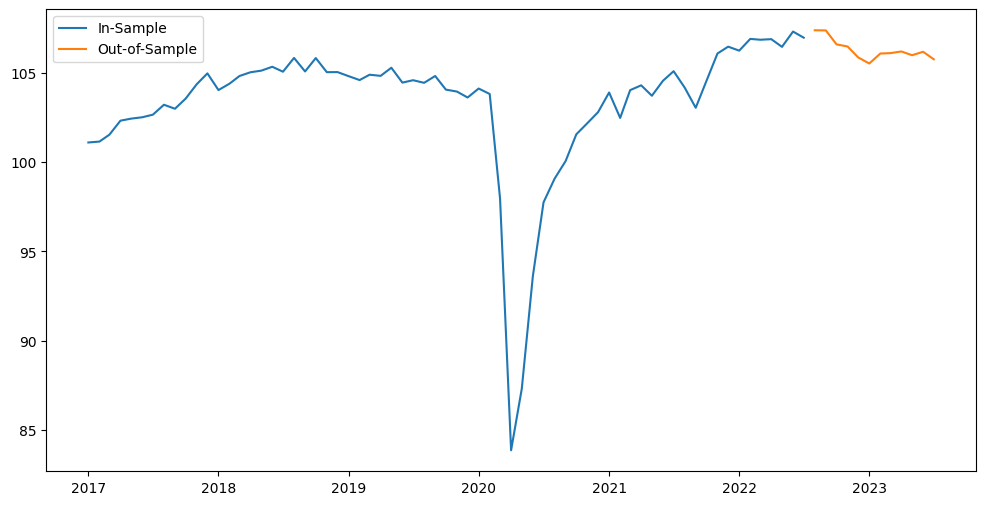

In [148]:
industrial = raw_industrial['2014':]
insample = industrial['2017':'2022-07']
outsample = industrial['2022-08':]

plt.figure(figsize=(12,6))
plt.plot(insample,  linewidth=1.5, label='In-Sample')
plt.plot(outsample,  linewidth=1.5, label='Out-of-Sample')
plt.legend()
# plt.tight_layout()

In [172]:
insample = pd.read_excel(r'OECDInterpolated.xlsx', index_col=0)
insample.index = pd.to_datetime(insample.index)


<AxesSubplot: xlabel='TIME'>

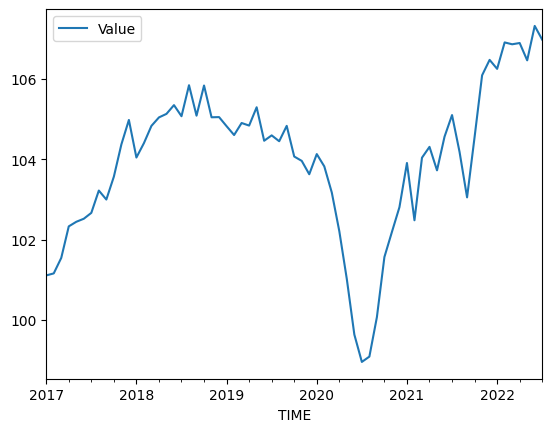

In [173]:
insample.plot()

## ARIMA

#### Stationarity Tests

##### ADF Test:

In [174]:
from utils import adf_test

adf_test(insample)

-------------None--------------
ADF Statistic:0.9918323207234698
p-value: 0.9148186924022621
Used Lags: 0
Critical Values: {'1%': -2.6004484022038565, '5%': -1.9457335914238807, '10%': -1.613330582408103}
--> Non-Stationary
-------------Constant--------------
ADF Statistic:-1.5109275567127254
p-value: 0.5280988734668337
Used Lags: 0
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
--> Non-Stationary
-------------Constant/Trend--------------
ADF Statistic:-1.5585324985277387
p-value: 0.8082495324330234
Used Lags: 0
Critical Values: {'1%': -4.102930985196315, '5%': -3.4792434170910203, '10%': -3.167204658151766}
--> Non-Stationary


##### KPSS Test 

In [91]:
from utils import kpss_test

kpss_test(insample)

-------------Constant--------------
KPSS Statistic:0.22380142616409693
p-value: 0.1
Used Lags: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
--> Stationary
-------------Constant/Trend--------------
KPSS Statistic:0.15041865393767978
p-value: 0.046317788385266845
Used Lags: 5
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
--> Non-Stationary


c:\Users\vnaza\OneDrive\Documentos\Projetos\PredictingIndustrialProduction\utils.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(y_vector, regression=regression_type)


##### ADF Test Differenced Once

In [175]:
adf_test(insample.diff()[1:])

-------------None--------------
ADF Statistic:-7.349743829676347
p-value: 9.88443124093568e-12
Used Lags: 0
Critical Values: {'1%': -2.6009953846153846, '5%': -1.945815064178425, '10%': -1.6132838543468364}
--> Stationary
-------------Constant--------------
ADF Statistic:-7.398972600562154
p-value: 7.644122157003011e-11
Used Lags: 0
Critical Values: {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}
--> Stationary
-------------Constant/Trend--------------
ADF Statistic:-7.338672661122429
p-value: 2.3915033059499284e-09
Used Lags: 0
Critical Values: {'1%': -4.105265484751935, '5%': -3.4803385352753753, '10%': -3.1678389485662266}
--> Stationary


<AxesSubplot: xlabel='TIME'>

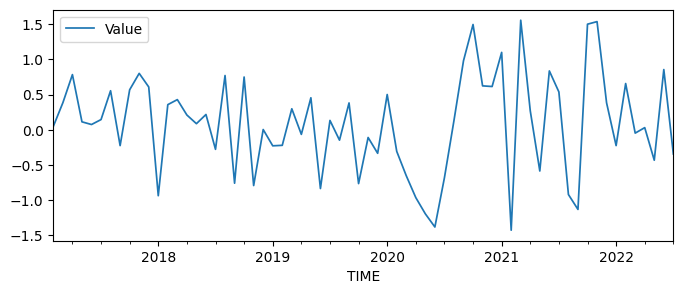

In [179]:
insample.diff()[1:].plot(linewidth=1.25, figsize=(8,3))

#### ACF and PACF Analysis

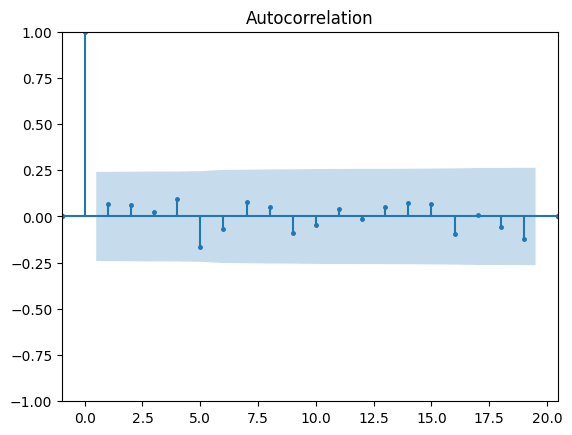

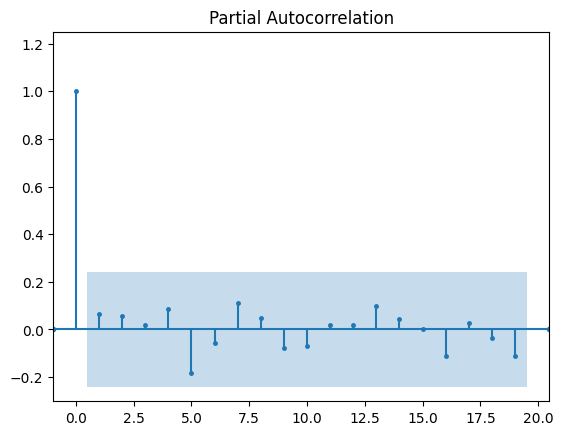

In [180]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(insample.diff()[1:], marker='.')
pacf = plot_pacf(insample.diff()[1:], auto_ylims=True, marker='.')

#### Model Estimation

In [181]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_111 = SARIMAX(endog=insample, order=(1,1,1), freq='MS', use_exact_diffuse=True).fit()
arima_111.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   67
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.528
Date:                Sun, 15 Oct 2023   AIC                            151.056
Time:                        23:21:30   BIC                            159.875
Sample:                    01-01-2017   HQIC                           154.546
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5933      0.572      1.038      0.299      -0.527       1.714
ma.L1         -0.5076      0.595     -0.854      0.393      -1.673       0.658
sigma2         0.4974      0.096      5.187      0.000       0.309       0.685
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.85   Prob(JB):                         0.90
Heteroskedasticity (H):               2.93   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
print(arima_111.tvalues)
print(arima_211.tvalues)
print(arima_auto.tvalues)

1.96

ar.L1     1.037937
ma.L1    -0.853878
sigma2    5.186865
dtype: float64
ar.L1    -0.023804
ar.L2    -0.035132
ma.L1     0.014450
sigma2    4.873672
dtype: float64
sigma2    5.496301
dtype: float64


1.96


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 9.410190844249517
Ljung-Box p-value: 0.9776508756085911
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 0.2155744265854259
Jarque Bera p-value: 0.897818619973964


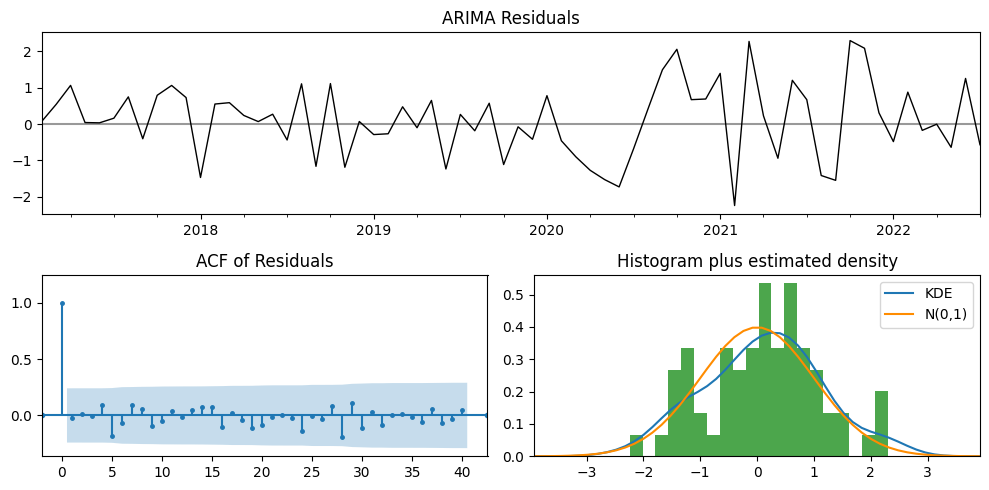

In [184]:
from utils import checkresiduals
checkresiduals(arima_111)

In [185]:
arima_211 = SARIMAX(endog=insample, order=(2,1,1), freq='MS', use_exact_diffuse=True).fit()
arima_211.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   67
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -71.496
Date:                Sun, 15 Oct 2023   AIC                            152.992
Time:                        23:24:49   BIC                            164.015
Sample:                    01-01-2017   HQIC                           157.354
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4155      1.351      0.308      0.758      -2.233       3.064
ar.L2          0.0430      0.205      0.210      0.834      -0.358       0.444
ma.L1         -0.3423      1.331     -0.257      0.797      -2.951       2.266
sigma2         0.4968      0.096      5.183      0.000       0.309       0.685
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.93   Prob(JB):                         0.91
Heteroskedasticity (H):               2.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 9.599840081394722
Ljung-Box p-value: 0.974861282902647
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 0.1909845102973612
Jarque Bera p-value: 0.9089254011185034


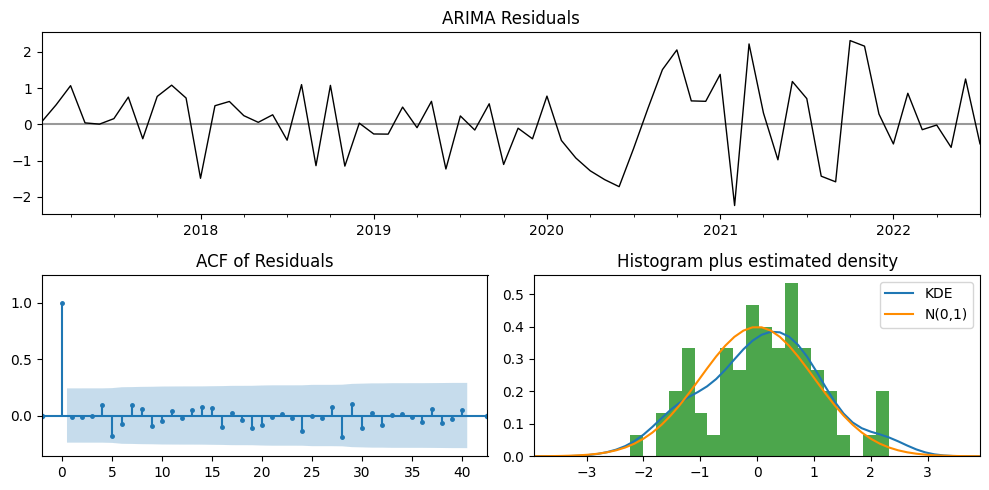

In [186]:
checkresiduals(arima_211)

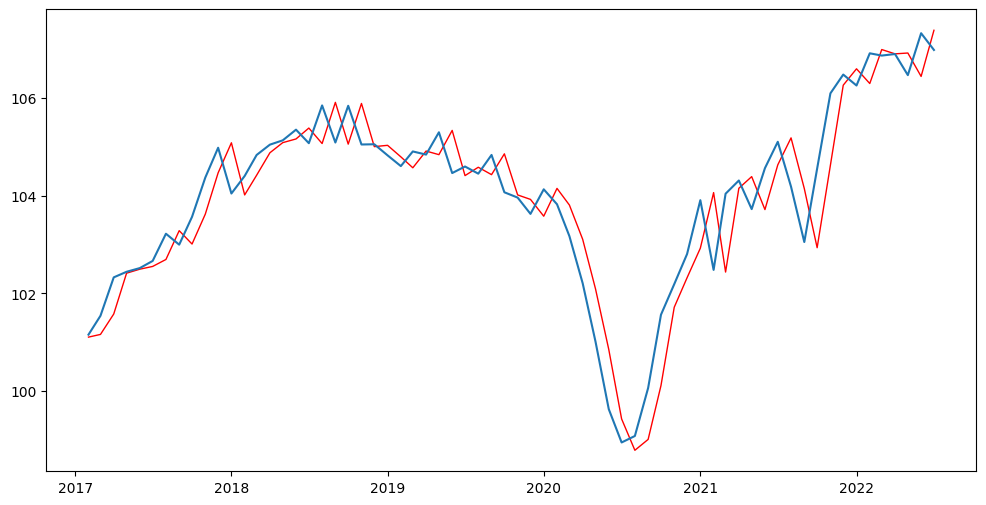

In [160]:
plt.figure(figsize=(12,6))
plt.plot(arima_111.predict()[1:], color='red',linewidth=1)
plt.plot(insample[1:])
plt.show()

In [183]:
import pmdarima as pm

auto_search = pm.auto_arima(y=insample,
                            start_p=1,
                            start_q=1,
                            test='adf',
                            max_p=10, 
                            max_d=1, 
                            max_q=10,
                            error_action='ignore',
                            information_criterion = 'aic',
                            suppress_warnings=True,
                            maxiter=100, 
                            stepwise=True)

arima_auto = SARIMAX(insample,order=auto_search.order, freq='MS',use_exact_diffuse=True).fit()
arima_auto.summary()

c:\Users\vnaza\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   67
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -71.906
Date:                Sun, 15 Oct 2023   AIC                            147.813
Time:                        23:22:34   BIC                            152.222
Sample:                    01-01-2017   HQIC                           149.558
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5032      0.098      5.151      0.000       0.312       0.695
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.58   Prob(JB):                         0.81
Heteroskedasticity (H):               2.97   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


=========== Ljung-Box ===========
Ljung-Box Test Statistic: 9.847079117188358
Ljung-Box p-value: 0.9708607855164008
=========== Jarque-Bera ===========
Jarque Bera Test Statistic: 0.4230764826805943
Jarque Bera p-value: 0.8093383302784263


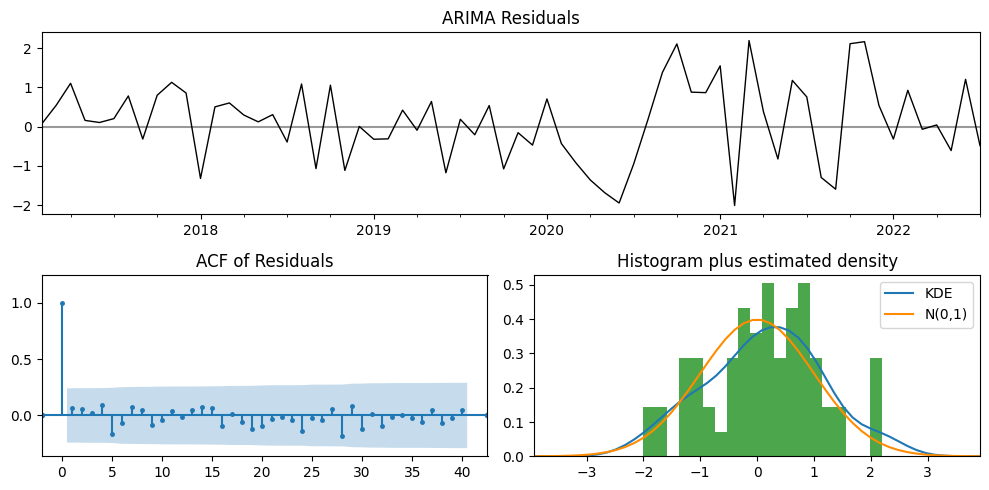

In [187]:
from utils import checkresiduals
checkresiduals(arima_auto)

,Value
Metric,
RMSE,0.397251
MAE,0.311171
MAPE,0.002929


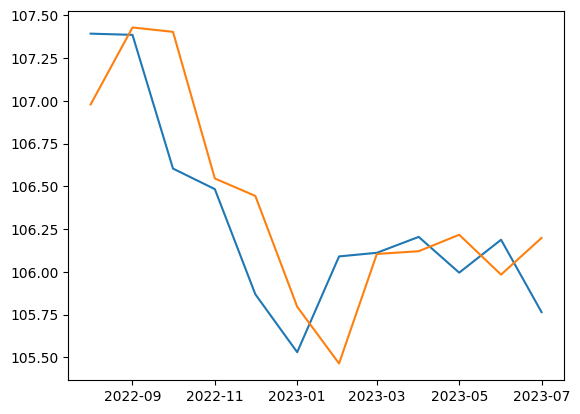

In [188]:
from utils import one_step_arima, metrics

arima_predictions = one_step_arima(arima_111, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

df_metrics_arima = metrics(outsample, arima_predictions)
df_metrics_arima.set_index('Metric', inplace=True)
df_metrics_arima


,Value
Metric,
RMSE,0.394767
MAE,0.307996
MAPE,0.002899


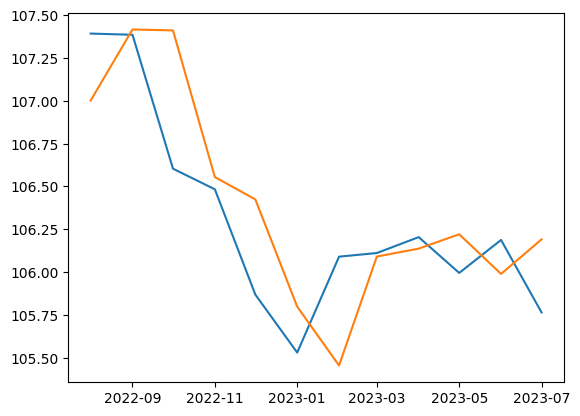

In [191]:
arima_predictions = one_step_arima(arima_211, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

df_metrics_arima = metrics(outsample, arima_predictions)
df_metrics_arima.set_index('Metric', inplace=True)
df_metrics_arima

,Value
Metric,
RMSE,0.394767
MAE,0.307996
MAPE,0.002899


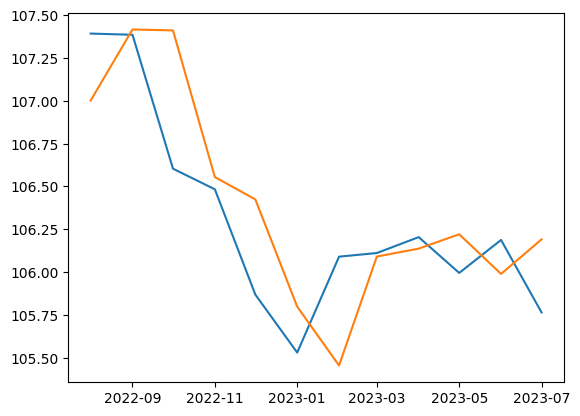

In [193]:
rw_predictions = one_step_arima(arima_auto, outsample)

plt.plot(outsample)
plt.plot(outsample.index, arima_predictions)

df_metrics_rw = metrics(outsample, arima_predictions)
df_metrics_rw.set_index('Metric', inplace=True)
df_metrics_rw

## ANN

##### Feature Engineering

In [166]:
import pandas_ta as ta
industrial_ann = pd.concat((insample, outsample), axis=0)
lags = 3
industrial_ann.rename(columns={'Value': 'Target'}, inplace=True)

for i in range(1,lags+1):
    industrial_ann[f'Lag_{i}'] = industrial_ann['Target'].shift(i)

industrial_ann.dropna(inplace=True)
industrial_ann

,Target,Lag_1,Lag_2,Lag_3
TIME,,,,
2017-04-01,102.3277,101.5424,101.1564,101.1060
2017-05-01,102.4418,102.3277,101.5424,101.1564
2017-06-01,102.5177,102.4418,102.3277,101.5424
2017-07-01,102.6639,102.5177,102.4418,102.3277
2017-08-01,103.2199,102.6639,102.5177,102.4418
...,...,...,...,...
2023-03-01,106.1116,106.0904,105.5307,105.8691
2023-04-01,106.2045,106.1116,106.0904,105.5307
2023-05-01,105.9955,106.2045,106.1116,106.0904


#### Train Test Split

In [167]:
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from utils import Dataset

train = industrial_ann['2017':'2022-07']
test = industrial_ann['2022-08':]

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]


#### Model Estimation

In [168]:
from skorch.net import NeuralNet
from skorch.callbacks import Checkpoint, EarlyStopping, EpochScoring
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from FeedForwardANN import FeedForwardANN
import torch.nn as nn
from torch.optim import Adam
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

network = FeedForwardANN(input_dim=len(X_test.columns))
net = NeuralNet(network,
    criterion= nn.MSELoss(),
    max_epochs=500,
    lr=0.1,
    batch_size=16,
    callbacks=[Checkpoint(load_best=True)],
    optimizer = Adam,
    )


pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('net', net),
])

# params = {
#     'net__lr': [0.5, 0.2 , 0.1, 0.01 ],
#     'net__batch_size': [5,8,16],
#     # 'net__module__h_neuron':[2,3,5,8],
#     # 'net__module__input_dim':[len(X_test.columns)]
# }

gs = pipe.fit(X_train.values.astype('float32'), y_train.values.reshape(-1, 1).astype('float32'))
# 
# gs = GridSearchCV(pipe, params,cv=TimeSeriesSplit(n_splits=3),  scoring='neg_mean_squared_error', verbose=2)

# gs.fit(X_train.values.astype('float32'), y_train.values.reshape(-1, 1).astype('float32'))
# gs.best_params_

  epoch    train_loss    valid_loss    cp     dur
-------  ------------  ------------  ----  ------
      1    10564.2479     9887.0693     +  0.0040
      2     9423.7008     8271.6445     +  0.0040


      3     7222.8900     5471.8887     +  0.0040
      4     3906.5315     2008.7227     +  0.0050
      5     1006.6497      241.2661     +  0.0040
      6      952.1450      263.3963        0.0040
      7      868.0594      334.3853        0.0040
      8      473.6698      941.2406        0.0040
      9      747.5050     1296.5530        0.0030
     10      889.1799     1096.8188        0.0040
     11      680.4678      656.7621        0.0040
     12      446.6486      365.1589        0.0040
     13      380.2410      299.9990        0.0030
     14      360.7770      377.8853        0.0040
     15      360.1292      509.4732        0.0040
     16      397.6003      562.2717        0.0040
     17      401.9058      496.6946        0.0040
     18      356.9796      391.6162        0.0030
     19      311.2909      326.7240        0.0030
     20      286.9621      317.8647        0.0040
     21      277.7857      338.6605        0.0040
     22      276.8406      349.6683        0.0050


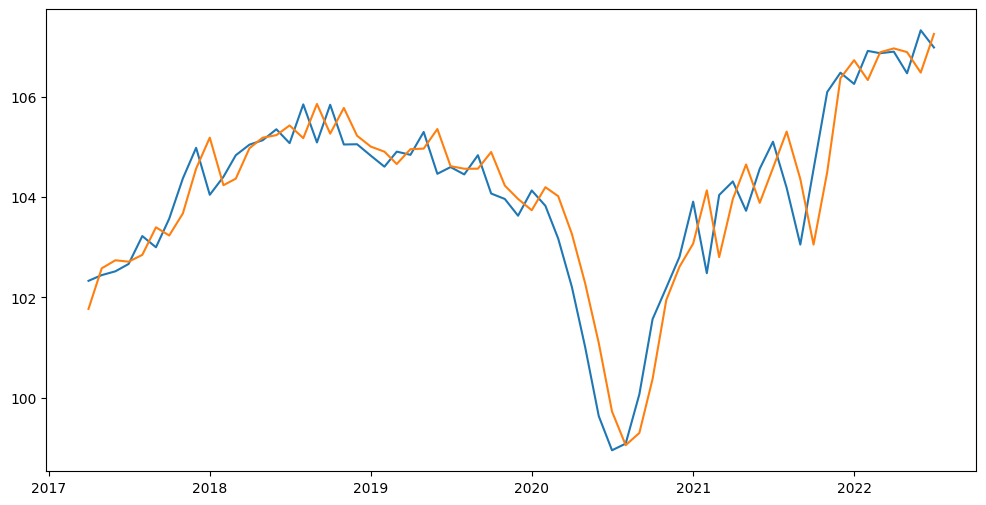

In [169]:
ann_grid_predictions = gs.predict(X_train.values.astype('float32'))

plt.figure(figsize=(12,6))
plt.plot(y_train)
plt.plot(y_train.index, ann_grid_predictions)

# df_metrics = metrics(outsample, ann_grid_predictions)
# df_metrics

,Value
Metric,
RMSE,0.385653
MAE,0.301934
MAPE,0.002843


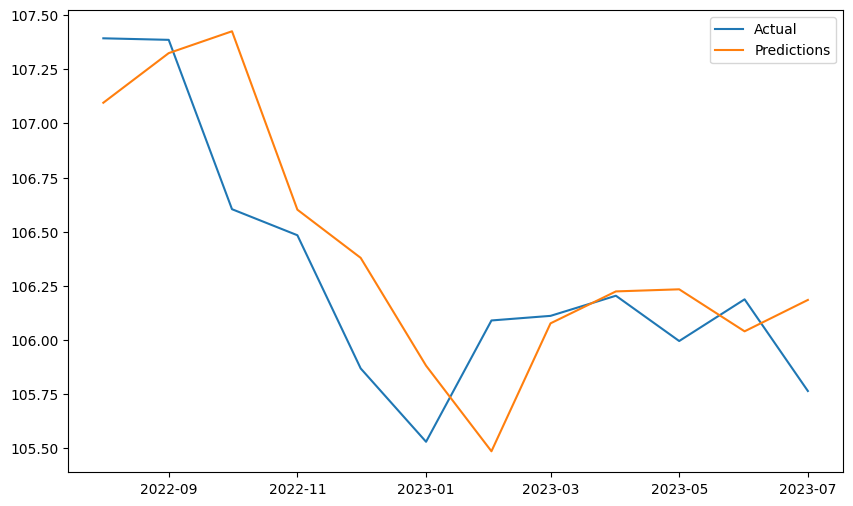

In [170]:
ann_grid_predictions = gs.predict(X_test.values.astype('float32'))

plt.figure(figsize=(10,6))
plt.plot(outsample, label='Actual')
plt.plot(outsample.index, ann_grid_predictions,label='Predictions')
plt.legend()


df_metrics_ann = metrics(outsample, ann_grid_predictions)
df_metrics_ann.set_index('Metric', inplace=True)
df_metrics_ann

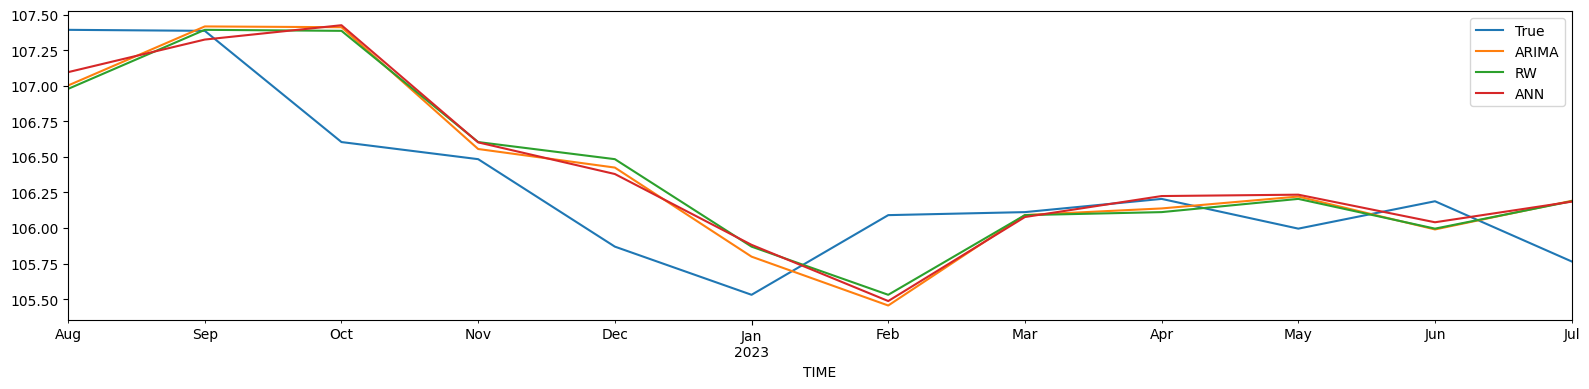

In [200]:
df_predictions = pd.DataFrame({})

df_predictions['True'] = outsample
df_predictions['ARIMA'] = arima_predictions
df_predictions['RW'] = rw_predictions
df_predictions['ANN'] = ann_grid_predictions

df_predictions.plot(figsize=(16, 4))
plt.tight_layout()

In [194]:
df_results = pd.DataFrame({})
df_results['Arima'] = df_metrics_arima
df_results['RW'] = df_metrics_rw
df_results['Ann'] = df_metrics_ann
df_results

,Arima,RW,Ann
Metric,,,
RMSE,0.394767,0.394767,0.385653
MAE,0.307996,0.307996,0.301934
MAPE,0.002899,0.002899,0.002843


In [87]:
df_results.to_excel('Metrics.xlsx')
df_predictions.to_excel('Predictions.xlsx')

In [84]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [199]:
rt = dm_test(df_predictions['True'],df_predictions['ANN'],df_predictions['RW'], h = 1, crit="MSE")
rt

dm_return(DM=-0.5012677723793596, p_value=0.626062408592257)